In [86]:
import pandas as pd
from sklearn.datasets import *
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
#PCA is a method that finds the principal componentes in a ML model

In [34]:
digits = load_digits()

In [35]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

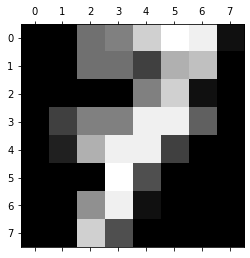

In [36]:
%matplotlib inline

plt.gray()
plt.matshow(digits.data[7].reshape(8,8))

In [37]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [38]:
df.head()
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [39]:
x = df
y = digits.target

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [41]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9311064718162839

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #n_components, float -- useful features and creates new dimensions (95%)
X_pca = pca.fit_transform(x)
X_pca.shape

(1797, 2)

In [44]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [45]:
pca.n_components_

2

In [46]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [47]:
logreg.fit(X_train_pca, y_train_pca)
logreg.score(X_test_pca, y_test_pca)

0.6083333333333333

In [48]:
h = pd.read_csv('heart.csv')
h.shape
h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
h.groupby(['RestingECG']).describe()

Age                                                     \
            count       mean       std   min   25%   50%   75%   max   
RestingECG                                                             
LVH         188.0  56.218085  8.855965  28.0  51.0  57.0  62.0  77.0   
Normal      552.0  51.740942  9.360491  29.0  45.0  52.0  59.0  75.0   
ST          178.0  56.140449  8.990732  30.0  52.0  57.0  62.0  77.0   

           RestingBP              ... Oldpeak      HeartDisease            \
               count        mean  ...     75%  max        count      mean   
RestingECG                        ...                                       
LVH            188.0  134.335106  ...     1.8  6.2        188.0  0.563830   
Normal         552.0  130.635870  ...     1.5  5.6        552.0  0.516304   
ST             178.0  135.808989  ...     1.7  5.0        178.0  0.657303   

                                               
                 std  min  25%  50%  75%  max  
RestingECG                                     
LVH         0.497233  0.0  0.0  1.0  1.0  1.0  
Normal      0.500187  0.0  0.0  1.0  1.0  1.0  
ST          0.475950  0.0  0.0  1.0  1.0  1.0  

[3 rows x 56 columns]

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
hle = h
to_encode = ['Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for x in to_encode:
    hle[x] = le.fit_transform(hle[x])
hle = pd.get_dummies(hle, drop_first=True)
hle.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,2,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,1,1,0,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,1,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,2,0,0,1,0


In [57]:
x = hle.drop(['HeartDisease'], axis='columns')
y = hle['HeartDisease']

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [63]:
X_test, X_train, y_test, y_train = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [78]:
from sklearn.decomposition import PCA

pca = PCA(0.95) #n_components, float -- useful features and creates new dimensions (95%)
X_pca = pca.fit_transform(x)
X_pca.shape

(918, 2)

In [79]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [80]:
logreg.fit(X_train_pca, y_train_pca)
logreg.score(X_test_pca, y_test_pca)

0.7010869565217391

In [81]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train_pca)
model_rf.score(X_test_pca, y_test_pca)


0.6902173913043478

In [91]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_pca, y_train_pca)
svm.score(X_test_pca, y_test_pca)


0.7445652173913043